# Matching for Causal Inference

## Imports

In [1]:
from causaldata import nsw_mixtape

from src.causal_inference.evaluation import balance
from src.causal_inference.matching import greedy_matching, optimal_matching
from src.causal_inference.visualization import matching

In [2]:
data = nsw_mixtape.load_pandas().data

In [3]:
data.sample(5)

,data_id,treat,age,educ,black,hisp,marr,nodegree,re74,re75,re78
358,Dehejia-Wahba Sample,0,19,11,1,0,0,1,1626.623047,0.000000,0.000000
231,Dehejia-Wahba Sample,0,23,10,1,0,0,1,0.000000,0.000000,0.000000
242,Dehejia-Wahba Sample,0,24,11,1,0,0,1,0.000000,0.000000,14626.389648
190,Dehejia-Wahba Sample,0,18,9,1,0,0,1,0.000000,0.000000,9227.051758
390,Dehejia-Wahba Sample,0,22,11,1,0,0,1,7914.130859,1321.660034,2639.290039


In [4]:
treated = data[data["treat"] == 1]
control = data[data["treat"] == 0]
print(f"Treated: {len(treated)}")
print(f"Control: {len(control)}")

Treated: 185
Control: 260


In [5]:
covariates = ["age", "educ", "re74", "re75"]

matched_pairs_greedy = greedy_matching.greedy_match(treated, control, covariates=covariates, k=1)
matched_pairs_optimal = optimal_matching.optimal_match(treated, control, covariates=covariates, k=5)

In [6]:
len(matched_pairs_greedy), len(matched_pairs_optimal)

(185, 185)

In [7]:
matched_pairs_greedy

[(np.int64(0), [np.int64(232)]),
 (np.int64(1), [np.int64(187)]),
 (np.int64(2), [np.int64(260)]),
 (np.int64(3), [np.int64(253)]),
 (np.int64(4), [np.int64(313)]),
 (np.int64(5), [np.int64(187)]),
 (np.int64(6), [np.int64(255)]),
 (np.int64(7), [np.int64(278)]),
 (np.int64(8), [np.int64(195)]),
 (np.int64(9), [np.int64(212)]),
 (np.int64(10), [np.int64(318)]),
 (np.int64(11), [np.int64(195)]),
 (np.int64(12), [np.int64(316)]),
 (np.int64(13), [np.int64(223)]),
 (np.int64(14), [np.int64(317)]),
 (np.int64(15), [np.int64(347)]),
 (np.int64(16), [np.int64(279)]),
 (np.int64(17), [np.int64(185)]),
 (np.int64(18), [np.int64(275)]),
 (np.int64(19), [np.int64(310)]),
 (np.int64(20), [np.int64(234)]),
 (np.int64(21), [np.int64(275)]),
 (np.int64(22), [np.int64(226)]),
 (np.int64(23), [np.int64(242)]),
 (np.int64(24), [np.int64(245)]),
 (np.int64(25), [np.int64(292)]),
 (np.int64(26), [np.int64(282)]),
 (np.int64(27), [np.int64(291)]),
 (np.int64(28), [np.int64(332)]),
 (np.int64(29), [np.int6

In [8]:
balance_summary_greedy = balance.compute_balance_stats(data, matched_pairs_greedy, covariates=covariates)
balance_summary_optimal = balance.compute_balance_stats(data, matched_pairs_optimal, covariates=covariates)

In [9]:
balance_summary_greedy.abs()

,Treated Mean (Matched),Control Mean (Matched),Treated Std (Matched),Control Std (Matched),SMD Before,SMD After
age,25.816216,25.302703,7.155019,7.085291,0.107372,0.072323
educ,10.345946,10.194595,2.010650,1.643489,0.143676,0.084454
re74,2095.573730,2061.835449,4886.620117,5147.922852,0.002135,0.006290
re75,1532.055420,1432.504761,3219.250732,2810.801025,0.084148,0.031594


In [10]:
balance_summary_optimal.abs()

,Treated Mean (Matched),Control Mean (Matched),Treated Std (Matched),Control Std (Matched),SMD Before,SMD After
age,25.816216,25.762162,7.155019,6.385077,0.107372,0.007613
educ,10.345946,10.324324,2.010650,1.148867,0.143676,0.012065
re74,2095.573730,2009.316162,4886.620117,4615.344238,0.002135,0.016082
re75,1532.055420,1390.863770,3219.250732,2580.329346,0.084148,0.044809


In [11]:
balance.compute_variance_ratios(data, matched_pairs_greedy, covariates=covariates)

,Before Matching,After Matching
age,1.027755,1.019779
educ,1.551284,1.496715
re74,0.738095,0.901059
re75,1.076344,1.311745


In [12]:
balance.compute_variance_ratios(data, matched_pairs_optimal, covariates=covariates)

,Before Matching,After Matching
age,1.027755,1.255710
educ,1.551284,3.062908
re74,0.738095,1.121009
re75,1.076344,1.556537


In [13]:
balance.compute_ks_test(data, matched_pairs_greedy, covariates=covariates)

,Before Matching,After Matching
age,0.065177,0.070270
educ,0.126507,0.075676
re74,0.047089,0.043243
re75,0.107484,0.027027


In [14]:
balance.compute_ks_test(data, matched_pairs_optimal, covariates=covariates)

,Before Matching,After Matching
age,0.065177,0.028108
educ,0.126507,0.109189
re74,0.047089,0.036757
re75,0.107484,0.030270


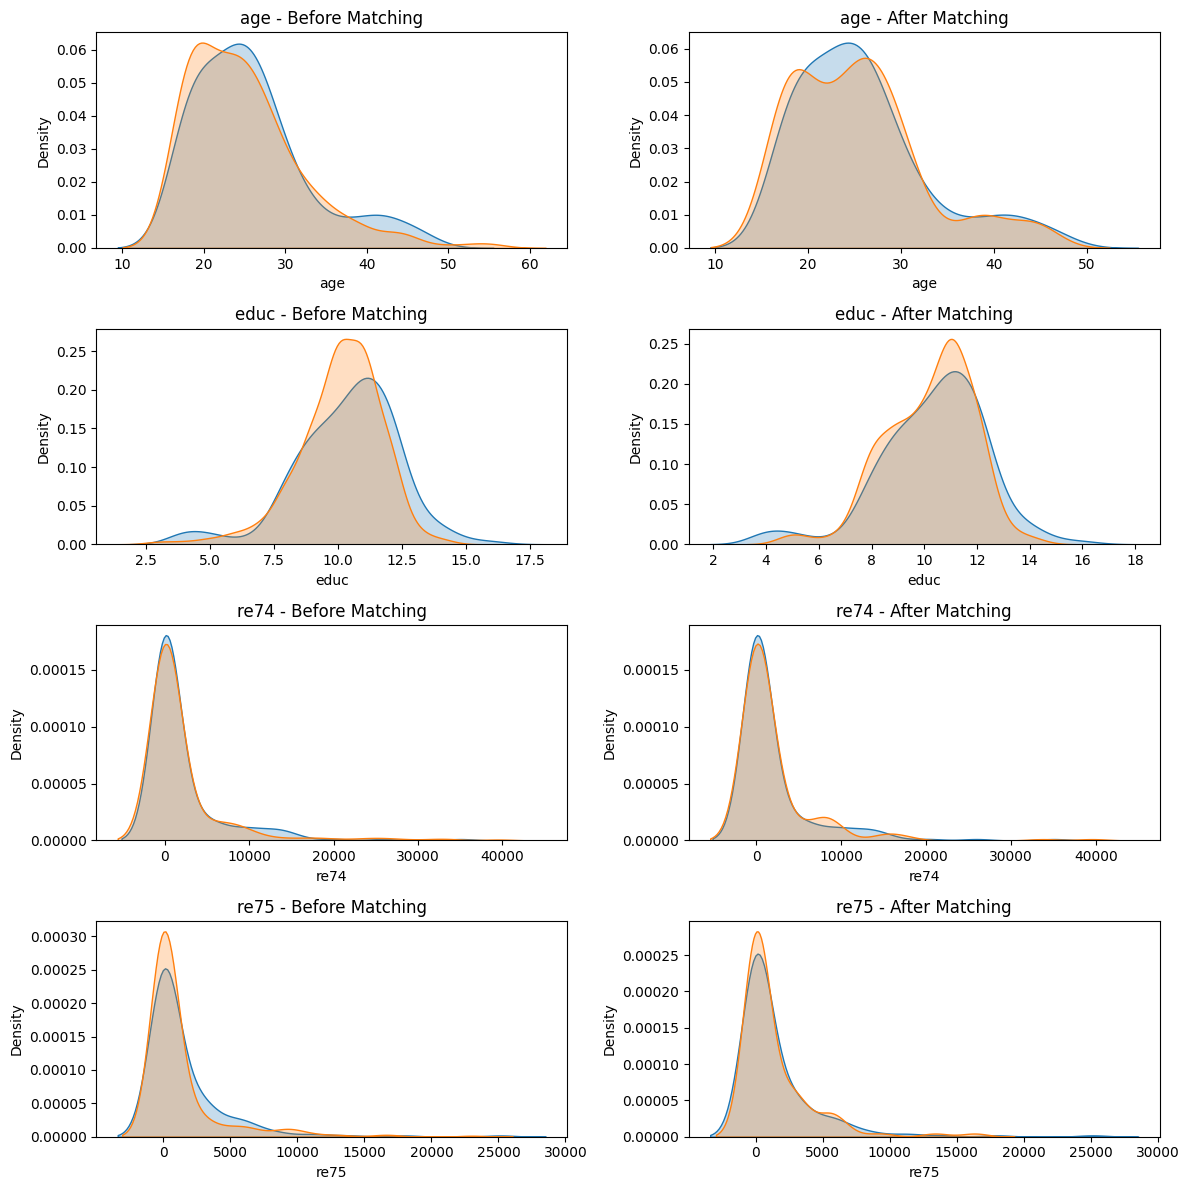

In [15]:
matching.plot_covariate_balance(data, matched_pairs_greedy, covariates=covariates)

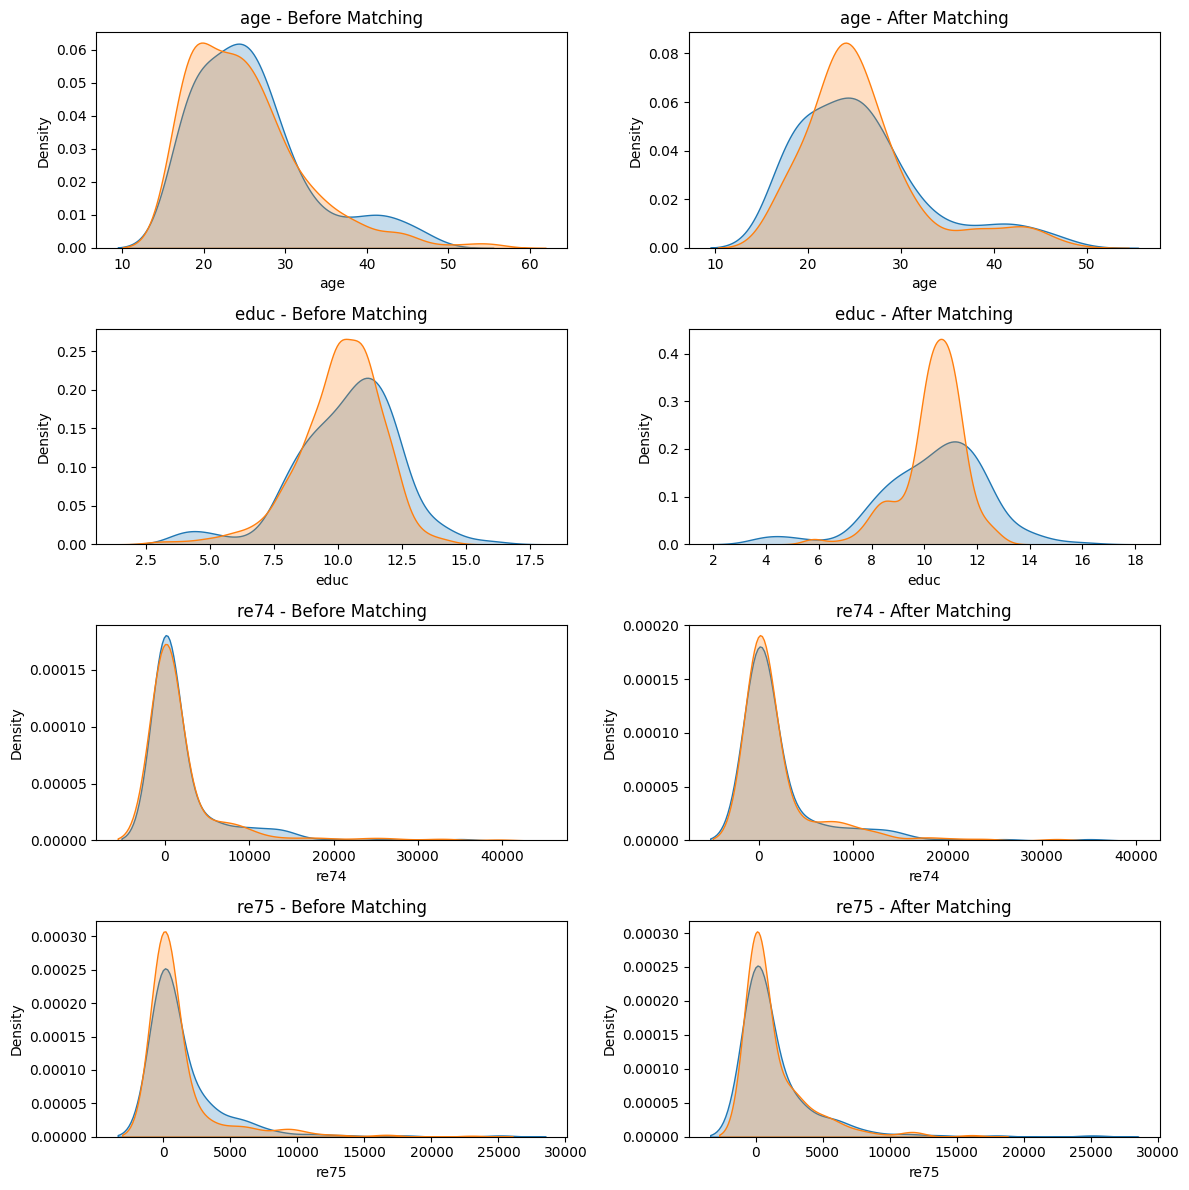

In [16]:
matching.plot_covariate_balance(data, matched_pairs_optimal, covariates=covariates)

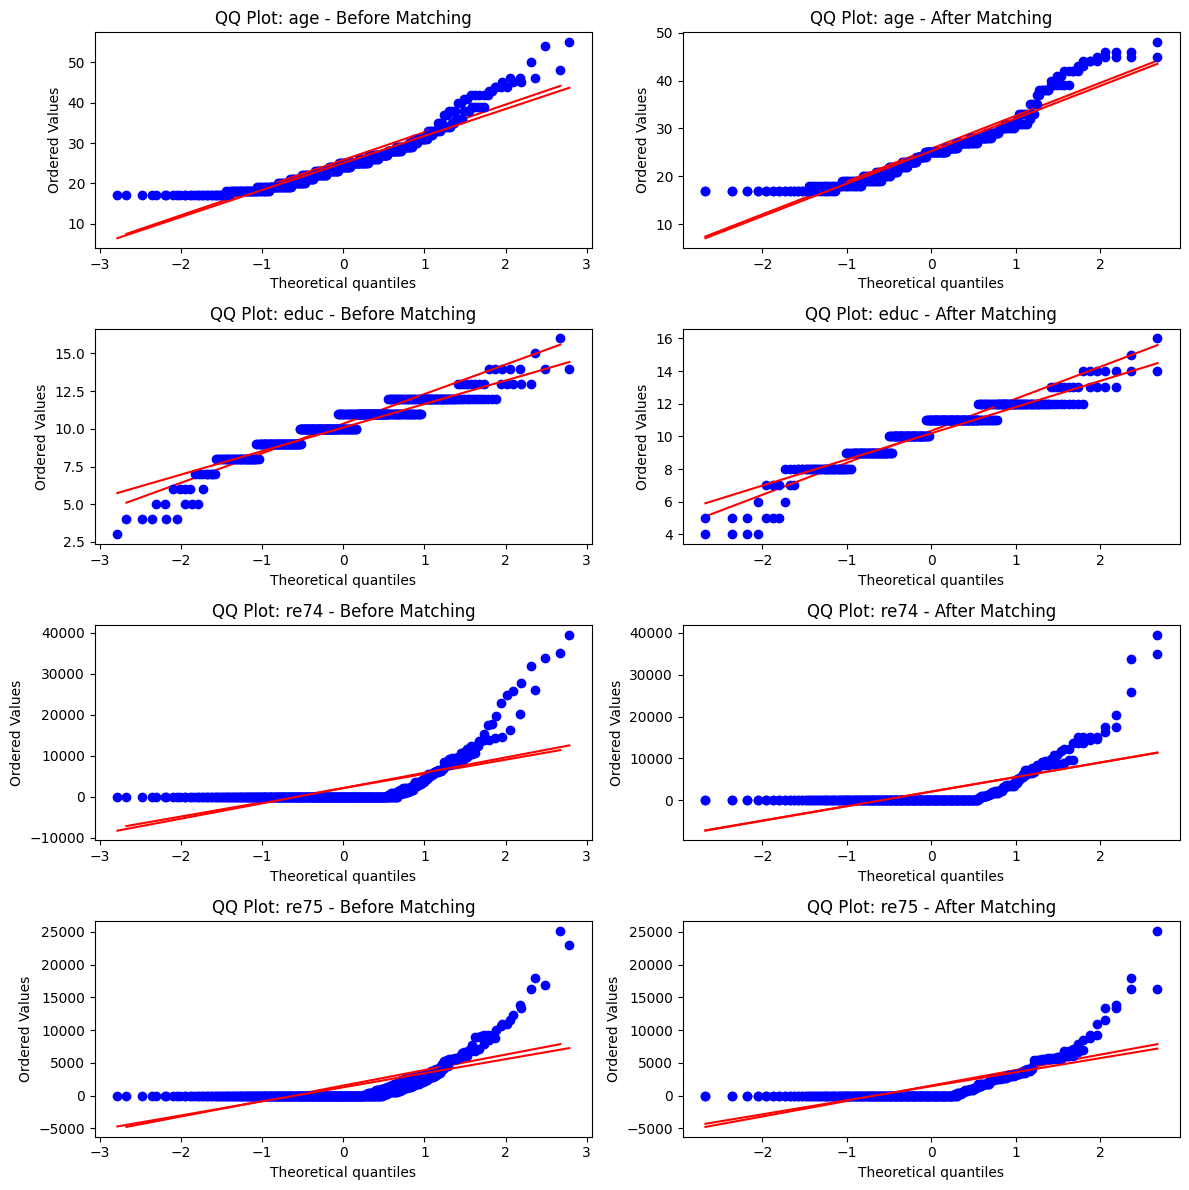

In [17]:
matching.plot_qq_balance(data, matched_pairs_greedy, covariates=covariates)